In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(7)
from sklearn.model_selection import train_test_split

# from keras.layers.recurrent import LSTM, GRU
# from keras import regularizers

NameError: name 'np' is not defined

In [ ]:
data = pd.read_csv('AirQuality.csv', delimiter=";", engine="python")
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(9471, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [ ]:
# Replacing the commas in the data and changing it to float values
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)

In [ ]:
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [ ]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [ ]:
# Handling null values and duplicates in the data
data.isnull().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(9357, 13)

In [ ]:
data.duplicated().sum()

31

In [ ]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9322,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9323,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9324,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Text(0.5, 1.0, 'Box Plots')

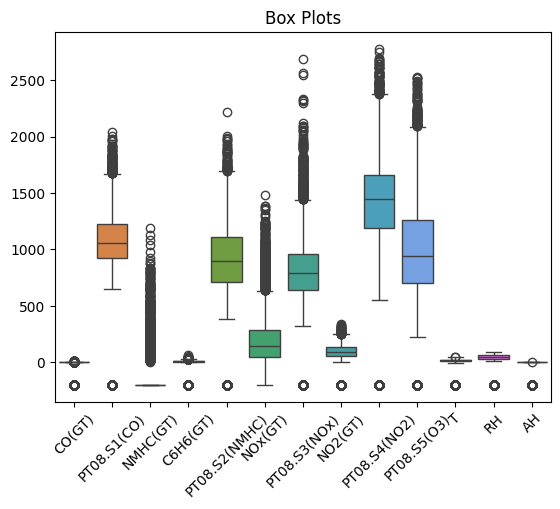

In [ ]:
# Handling Outilers of the data
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title('Box Plots')

In [ ]:
def remove_outliers(data,column,lower=0.01,upper=0.99):
    lower_bound = data[column].quantile(lower)
    upper_bound = data[column].quantile(upper)

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    outliers = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]

    return cleaned_data,outliers

In [ ]:
df = data.copy()

all_outliers = {}

for i in data.columns:
    cleaned_data,outliers = remove_outliers(df,i)

    df = cleaned_data
    all_outliers[i] = outliers

In [ ]:
df = df.reset_index().drop('index',axis=1)

In [ ]:
X = df.copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [ ]:
X.skew()

,0
CO(GT),0.176377
PT08.S1(CO),-1.124698
NMHC(GT),2.823522
C6H6(GT),0.759423
PT08.S2(NMHC),-0.563056
NOx(GT),0.447968
PT08.S3(NOx),-0.254220
NO2(GT),-0.266336
PT08.S4(NO2),-1.017517
PT08.S5(O3),-0.161851


In [ ]:
def compare_kde(column):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    df[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.subplot(1,2,2)
    X[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.show()

In [ ]:
y = X['AH']
X = X.drop('AH',axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=6,shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

ml_model = LinearRegression()
ml_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
ml_y_pred = ml_model.predict(X_test)

In [ ]:
ml_r2 = r2_score(y_true=y_test,y_pred=ml_y_pred)
ml_mae = mean_absolute_error(y_true=y_test,y_pred=ml_y_pred)
ml_mse = mean_squared_error(y_true=y_test,y_pred=ml_y_pred)

print(f'Mean Squared Error: {ml_mse}')
print(f'Mean Absolute Error: {ml_mae}')
print(f'R^2 Score: {ml_r2}')

Mean Squared Error: 0.13690238014113454
Mean Absolute Error: 0.28616242516491147
R^2 Score: 0.8573707712003538


In [ ]:
dl_model = Sequential()

dl_model.add(Dense(64,input_shape=(X_train.shape[1],)))
dl_model.add(LeakyReLU())
dl_model.add(Dense(128,activation='sigmoid'))
dl_model.add(Dense(1))

dl_model.compile(optimizer='adam',loss='mse',metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,281 (36.25 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [ ]:
dl_model.fit(X_train,y_train,epochs=10,callbacks=[early_stopping_callback])

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6486 - mse: 0.6486
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mse
  current = self.get_monitor_value(logs)


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0605 - mse: 0.0605
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301 - mse: 0.0301
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0221 - mse: 0.0221
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - mse: 0.0183
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - mse: 0.0150
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - mse: 0.0116
Epoch 9/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - mse: 0.0102
Epoch 10/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mse: 0.0088


In [ ]:
dl_y_pred = dl_model.predict(X_test).flatten()

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
dl_r2 = r2_score(y_true=y_test,y_pred=dl_y_pred)
dl_mae = mean_absolute_error(y_true=y_test,y_pred=dl_y_pred)
dl_mse = mean_squared_error(y_true=y_test,y_pred=dl_y_pred)

print(f'Mean Squared Error: {dl_mse}')
print(f'Mean Absolute Error: {dl_mae}')
print(f'R^2 Score: {dl_r2}')

Mean Squared Error: 0.008022578122714724
Mean Absolute Error: 0.06457982525781132
R^2 Score: 0.9916418244193557


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
num_epochs = 500
batch_size = 128
sequence_length = x_train.shape[1]
input_dim = x_train.shape[2]
out_dim = 1
hidden_dim = 32